In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [2]:
data = pd.read_csv('../data/MushroomDataset/processed_secondary_data.csv')

Poisonous mushrooms have a class of "1", edible "0".

In [3]:
X = data.drop(columns=['class'])
y = data['class']

## Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [5]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7769772392336662
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      5436
           1       0.80      0.80      0.80      6778

    accuracy                           0.78     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.78      0.78      0.78     12214

Confusion Matrix:
 [[4079 1357]
 [1367 5411]]


In [8]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8592949454919618


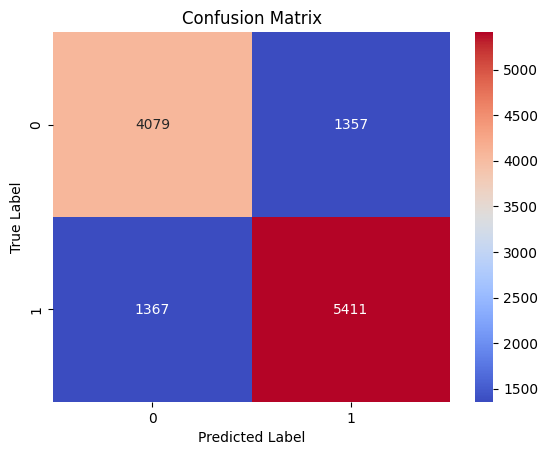

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Applying GridSearch to find best hyperparameters

In [11]:
parameter_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    ]

# Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=5000),
    param_grid=parameter_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # displaying the process
)

#### Evaluating the best model

In [14]:

'''
#fitting the model
grid_search.fit(X_train, y_train)

#best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("Solver used in the best model:", best_model.solver)
'''

'\n#fitting the model\ngrid_search.fit(X_train, y_train)\n\n#best parameters\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n\naccuracy = accuracy_score(y_test, y_pred)\n\nprint("Best Hyperparameters:", best_params)\nprint("Test Set Accuracy:", accuracy)\nprint("Solver used in the best model:", best_model.solver)\n'

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Test Set Accuracy: 0.7780415916161781

Solver used in the best model: lbfgs